In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [2]:
path = 'F:\Music_Notes'

In [3]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 32 .wav files in F:\Music_Notes


In [4]:
def get_features(y, sr):
    y = y[0:sr]
    S = librosa.feature.melspectrogram(y,sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [5]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
   # if i % 100 == 0:  this was because there were 6000 sounds in original dataset and printing every single is lengthy
    print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 32 = F:\Music_Notes\072_the-mystery-begins-guitar-space.wav
get 2 of 32 = F:\Music_Notes\074_acoustic-guitar-strummy1.wav
get 3 of 32 = F:\Music_Notes\074_acoustic-guitar-strummy2.wav
get 4 of 32 = F:\Music_Notes\075_coal-mine-guitar-part.wav
get 5 of 32 = F:\Music_Notes\079_bright-leady-guitar.wav
get 6 of 32 = F:\Music_Notes\080_country-boy-slide-guitar.wav
get 7 of 32 = F:\Music_Notes\080_country-boy-slide-guitar2.wav
get 8 of 32 = F:\Music_Notes\081_deeply-crunchy-guitar-stutter-funk.wav
get 9 of 32 = F:\Music_Notes\084_lone-wolf-guitar-strut.wav
get 10 of 32 = F:\Music_Notes\085_fretless-dulcimer.wav
get 11 of 32 = F:\Music_Notes\089_backwards-acoustic-guitar-looper.wav
get 12 of 32 = F:\Music_Notes\090_flangy-guitar-picked-melody.wav
get 13 of 32 = F:\Music_Notes\090_flangy-guitar-strummed-melody.wav
get 14 of 32 = F:\Music_Notes\A.wav
get 15 of 32 = F:\Music_Notes\B.wav
get 16 of 32 = F:\Music_Notes\Bb.wav
get 17 of 32 = F:\Music_Notes\C.wav
get 18 of 32 = F:\Music_Note

In [6]:
model = TSNE(n_components=2, learning_rate=150, perplexity=2, verbose=2, angle=0.1).fit_transform(feature_vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 0.052888
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 67.7011108, gradient norm = 0.4041650 (50 iterations in 0.014s)
[t-SNE] Iteration 100: error = 67.1612854, gradient norm = 0.5735350 (50 iterations in 0.017s)
[t-SNE] Iteration 150: error = 76.2537231, gradient norm = 0.8486378 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 69.4746933, gradient norm = 0.1742509 (50 iterations in 0.014s)
[t-SNE] Iteration 250: error = 72.5872498, gradient norm = 0.1808430 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.587250
[t-SNE] Iteration 300: error = 1.8943839, gradient norm = 0.0059306 (50 iterations in 0.003s)
[t-SNE] Iteration 350: error = 1.5113070, gradient norm = 0.0009624 (50 it

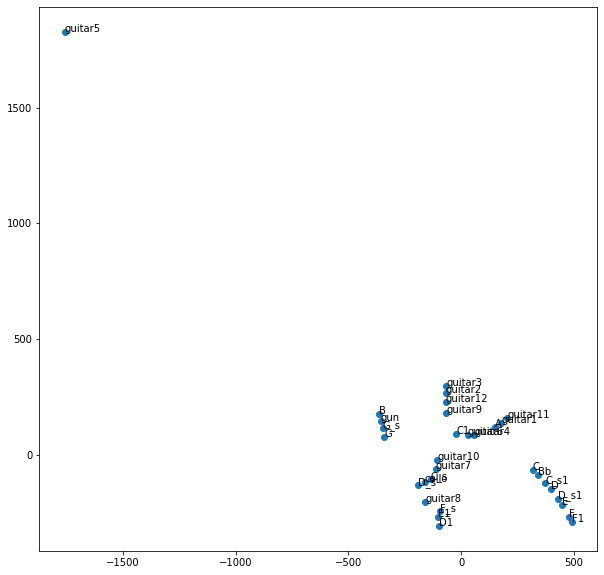

In [7]:
x_axis=model[:,0]
y_axis=model[:,1]
names = ['guitar1','guitar2','guitar3','guitar4','guitar5','guitar6','guitar7','guitar8','guitar9','guitar10','guitar11','guitar12','A','B','Bb','C','C_s','C_s1','C1','cello','D','D_s','D_s1','D1','E','E1','F','F_s','F1','G','G_s','gun']
plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
for i, txt in enumerate(names):
    plt.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

In [8]:
from playsound import playsound

In [9]:
#playsound(sound_paths[1])

In [10]:
import winsound

In [11]:
winsound.PlaySound(sound_paths[1], winsound.SND_ASYNC | winsound.SND_ALIAS )

In [12]:
winsound.PlaySound(None, winsound.SND_ASYNC)

<IPython.core.display.Javascript object>


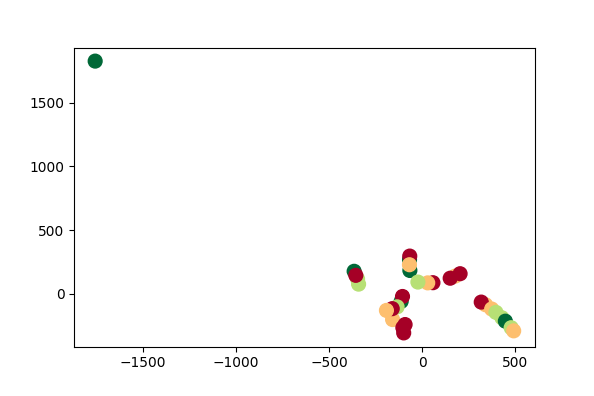

In [14]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np; np.random.seed(1)
import mpld3
x = x_axis
y = y_axis
names = ['guitar1','guitar2','guitar3','guitar4','guitar5','guitar6','guitar7','guitar8','guitar9','guitar10','guitar11','guitar12','A','B','Bb','C','C_s','C_s1','C1','cello','D','D_s','D_s1','D1','E','E1','F','F_s','F1','G','G_s','gun']

names = np.array(names)
c = np.random.randint(1,5,size=32)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), #index of sound name in list...ind["ind"] returns index string
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    
#def noice(ind):
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)            #ind is a dictionary  whether any values are within radius of mouse
        if cont:
            update_annot(ind)
            annot.set_visible(True)    
            winsound.PlaySound(sound_paths[ind["ind"][0]], winsound.SND_ASYNC | winsound.SND_ALIAS )
            #draws the arrow
            #why is noice() called in loop?....it is actually playing for the time the mouse is on the datapoint
            fig.canvas.draw_idle()
            #playsound(sound_paths[ind["ind"][0]])
            

        else:
            if vis:
                annot.set_visible(False)
                winsound.PlaySound(None, winsound.SND_ASYNC)
                fig.canvas.draw_idle()           #to update a figure and redraw.... i guess not really needed
                #playsound.stop()
                #if(True):
                #playsound(sound_paths[ind["ind"][0]])
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()


In [ ]:
def noice(ind):
    playsound(sound_paths[ind["ind"][0]])
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)            #ind is a dictionary  whether any values are within radius of mouse
        if cont:
            update_annot(ind)
            annot.set_visible(True)              #draws the arrow
            noice(ind)  #why is noice() called in loop?....it is actually playing for the time the mouse is on the datapoint
            #cont = False
            fig.canvas.draw_idle()
        else:
            annot.set_visible(False)
            cont = False
            fig.canvas.draw_idle()           #to update a figure and redraw.... i guess not really needed

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()


In [ ]:
print(cnt)

In [ ]:
type(sc)

In [ ]:
type(ax)

In [ ]:
def mus():
    playsound(sound_paths[1])
while True:
    mus()